## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split


import warnings

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv(r"C:\Users\CHAITANYA\OneDrive\Desktop\CHINNA\DATA SETS\gemstone.csv")

#### Show Top 5 Records

In [3]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


#### Preparing X and Y variables

In [4]:
X = df.drop(columns=['price'],axis=1)

In [5]:
X.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77


In [6]:
print("Categories in'cut' variable:",end=" ")
print(df['cut'].unique())

print("Categories in 'color' variable:     ",end=" " )
print(df['color'].unique())

print("Categories in 'clarity' variable:     ",end=" " )
print(df['clarity'].unique())

Categories in'cut' variable: ['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']
Categories in 'color' variable:      ['F' 'J' 'G' 'E' 'D' 'H' 'I']
Categories in 'clarity' variable:      ['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']


In [7]:
y = df['price']

In [8]:
y

0         13619
1         13387
2          2772
3           666
4         14453
          ...  
193568     1130
193569     2874
193570     3036
193571      681
193572     2258
Name: price, Length: 193573, dtype: int64

In [10]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
categoric_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", categoric_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [11]:
X = preprocessor.fit_transform(X)

In [12]:
X.shape

(193573, 27)

In [13]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((154858, 27), (38715, 27))

#### Create an Evaluate Function to give all metrics after model Training

In [14]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [16]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 951.6917
- Mean Absolute Error: 626.6162
- R2 Score: 0.9445
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 944.6694
- Mean Absolute Error: 622.8663
- R2 Score: 0.9448


Lasso
Model performance for Training set
- Root Mean Squared Error: 952.2039
- Mean Absolute Error: 624.6163
- R2 Score: 0.9444
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 945.0152
- Mean Absolute Error: 620.9552
- R2 Score: 0.9447


Ridge
Model performance for Training set
- Root Mean Squared Error: 951.6892
- Mean Absolute Error: 626.6931
- R2 Score: 0.9445
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 944.6626
- Mean Absolute Error: 622.9485
- R2 Score: 0.9448


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 592.1242
- Mean Absolute Error: 315.5636
- R2 Score: 0.

### Results

In [17]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.978977
6,XGBRegressor,0.978244
5,Random Forest Regressor,0.977601
3,K-Neighbors Regressor,0.967253
4,Decision Tree,0.957810
2,Ridge,0.944777
0,Linear Regression,0.944776
1,Lasso,0.944735
8,AdaBoost Regressor,0.891323


## Linear Regression

In [21]:
rf_model = RandomForestRegressor()
rf_model = rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 97.76


## Plot y_pred and y_test

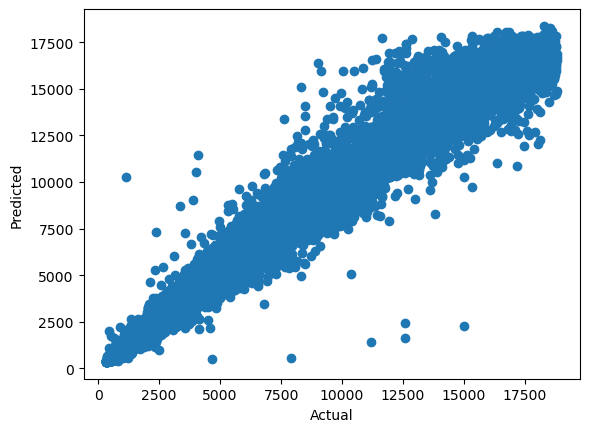

In [22]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

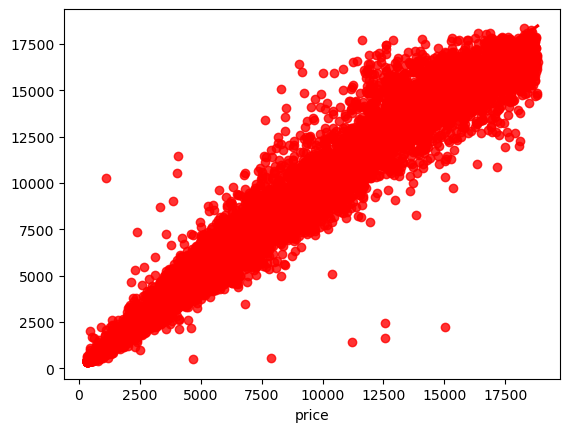

In [23]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [24]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
14868,1355,1351.93,3.07
165613,14691,14563.12,127.88
96727,844,661.08,182.92
145593,707,709.67,-2.67
118689,5797,6007.62,-210.62
...,...,...,...
168548,3864,4077.18,-213.18
167333,734,786.25,-52.25
113317,3950,3799.54,150.46
25575,1197,1258.98,-61.98
